# Matplotlib

*Chris Wu*  
*2016年10月*

**注意：建议无经验的读者先阅读 [Numpy & Pandas](https://github.com/wklchris/Note-by-Jupyter/blob/master/Python/Numpy%20&%20Pandas.ipynb)。不过如果你只是想要学习简单的画图功能而不是一整套数据可视化方案，你可以不必学习 Numpy&Pandas 而直接阅读本笔记。**

---

本手册中的每一个例子都默认加载了以下三行内容：

In [1]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

# 引言：简单的示例

最基本的命令是 plt.plot 和 plt.show 命令：

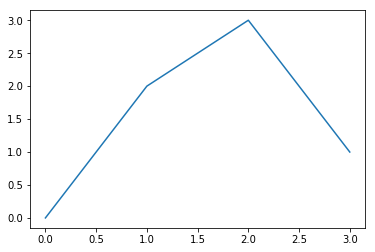

In [2]:
x = [0, 1, 2, 3]
y = [0, 2, 3, 1]
plt. plot(x, y)
plt.show()

如果你有 NumPy 相关的知识，你也可以使用其他命令：

In [3]:
# 你也可以使用以下两种写法，返回结果一致
x = np.linspace(0, 4, 4)  # 区间[0, 4]上一共4个点的均匀数组
x = np.arange(0, 5, 1)    # 区间[0, 5)上步长为1的均匀数组

# 基础命令

## 绘图：plt.plot

最基本的 plt.plot 命令还有许多参数可以使用。包括线型（linestyle）、线宽（linewidth）、点样式（marker）和线色(linecolor)。

| **线型**    |          |           |            |
| ---       | ---         | ---       | ---         |
| '-' 实线    |  '--' 虚线    | '-.' 点划线  |  ':' 点线      |
| **点样式**   |          |           |            |
| '.' 实心点   | ',' 像素点   | 'o' 圆点   | 's' 方块      |
| 'v' 下折箭头  | '^' 上折箭头  | '<' 左折箭头  | '>' 右折箭头   | 
| 'p' 五边形   | '\*' 星形    | 'h' 六边形   | 'H' 变种六边形  |
| '+' 加号    |  'x' X号     | 'D' 钻石形   |  'd' 纤钻石形  | 
| '&#124;' 竖线    | '\_' 横线    |          |          |
| **线色**    |           |          |            |
| RGB  | 'r' 红  | 'g' 绿   | 'b' 蓝  |  
| CMYK | 'c'/'m' 青/洋红 | 'y'/'k' 黄/黑  | 'w' 白 |

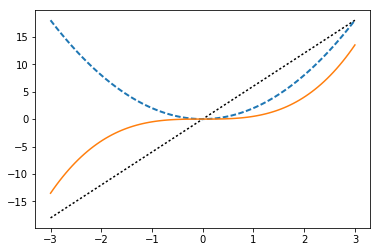

In [4]:
x = np.linspace(-3, 3, 100)
y1 = 6*x
y2 = 2*x**2

plt.plot(x, y1, color='black', linestyle=':')  # 你也可以偷懒写成：plt.plot(x, y1, 'b:')
plt.plot(x, y2, linewidth=2, linestyle='--')
plt.plot(x, [xi**3/2 for xi in x])
plt.show()

其中颜色**可以自己用 RGB 坐标，或者灰度，或者 6位HTML颜色码**指定。

    ... color = '#66ccff'  # 写成大写形式也可以：'#66CCFF' 
    ... color = (1, 0, 0)  # RGB形式
    ... color = '0.8 '    # 灰度形式 (1.0是白色, 0.0 是黑色)

其他的一些可能用到的参数也列出如下，请自行测试：

| 参数 | 含义 | 可选值 |
| --- | --- | --- |
| markeredgewidth | 点边线宽度 | 数字 |
| markeredgecolor | 点边线颜色 | 同 linecolor |
| markerfacecolor | 点内部颜色 | 同 linecolor |
| markersize    | 点大小     | 数字 | 
| dashes       | 虚线比例   | 元组(a, b)，“线：空距” | 
| drawstyle     | 绘制样式   | 'default/steps/steps-pre/steps-mid' |
| solid_capstyle  | 线段末端样式 | 'butt/round/projecting' |

## 叠加绘图：plt.hold

一个简单的命令，用于控制是否开启叠加绘图模式（默认开启）。

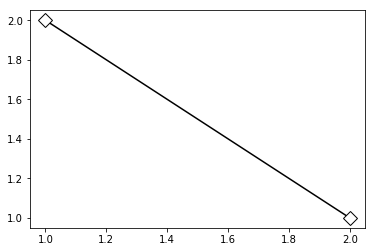

In [5]:
plt.plot([1, 2], [1, 2], 'r-')  # 这条命令被后面的覆盖了，没有显示出来
plt.hold(False)
plt.plot([1, 2], [2, 1], 'k-D', markersize=10, markerfacecolor='w')
plt.show()

## 坐标轴区间：plt.axis/plt.xlim/plt.ylim

关于坐标轴数值范围的问题使用这几个命令可以解决。例如，可以通过 plt.axis 命令调整绘图范围：

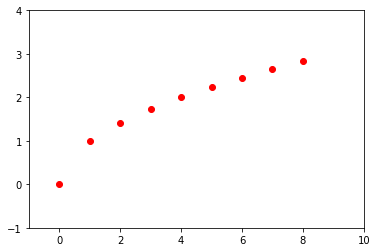

In [6]:
x = np.arange(0, 9, 1)
y = x**(1/2)
plt.plot(x, y, 'ro')

plt.axis([-1, 10, -1, 4])
plt.show()

plt.axis 也可以用 xmin/xmax/ymin/ymax 参数，仅仅指定一侧的范围，比如：

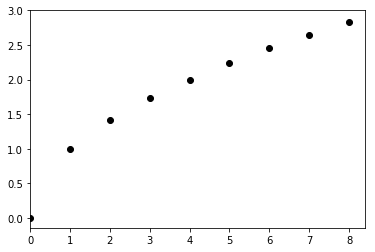

In [7]:
plt.plot(x, y, 'ko')

plt.axis(xmin=0, ymax=3)
plt.show()

其他的一些 plt.axis 的参数：

| 参数可选值 | 含义 |
| --- | --- |
| 'off'    | 去除坐标轴 |
| 'equal'  | 使坐标轴区间长相同 | 
| 'scaled' | 使坐标轴单位刻度长相同 |
| 'tight'  | 使绘图范围恰好包括所有数据点 |
| 'square' | 结合 'equal' 与 'scaled'|

下面是一个例子：

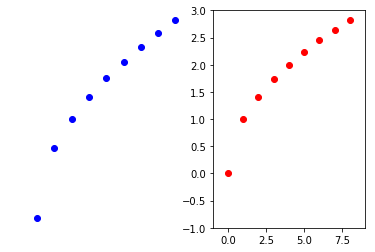

In [8]:
# subplot 是子图命令，(1,2,1)表示一共1行2列，画子图1
ax1 = plt.subplot(1, 2, 1)
plt.plot(x, y, 'bo')
plt.axis('off')

ax2 = plt.subplot(1, 2, 2)
plt.plot(x, y, 'ro')
plt.axis([-1, 9, -1, 3], 'scaled')

plt.show()

plt.xlim 还有 plt.ylim 的用法就不多说了，一句话带过：

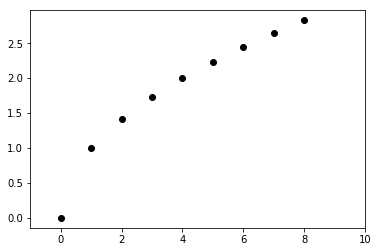

In [9]:
plt.plot(x, y, 'ko')

plt.xlim([-1, 10])
plt.show()

## 坐标轴刻度：plt.xticks/plt.yticks



## 坐标轴标签：plt.xlabel/plt.ylabel

## 网格线：plt.grid

## 图例：plt.legend

## 标题：plt.title

## 添加文字：plt.text

## 子图：plt.subplot

## 保存图片：fig.savefig

# 常见的问题

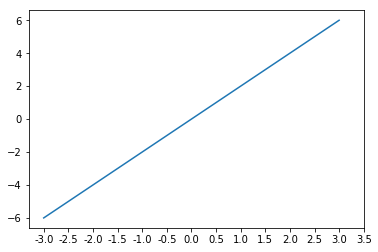

In [10]:
# 如何更改坐标轴小数点位数
import matplotlib.ticker as ticker

x = np.linspace(-3, 3, 100)
y = 2*x
fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_ticks(np.arange(-3, 4, 0.5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.show()